# WaveGrowth

## Computes the wave height from water depth and wind fetch

November 2016
Bart Grasmeijer

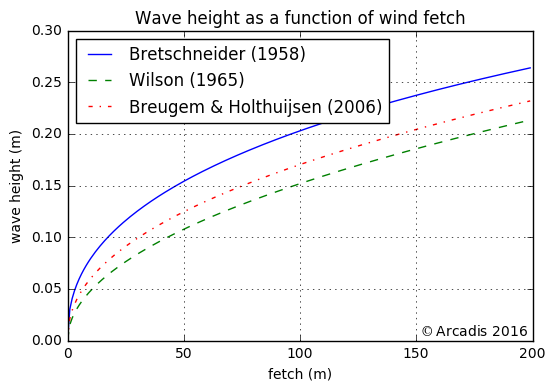

In [1]:
# -*- coding: utf-8 -*-
"""
# Copyright notice
#   --------------------------------------------------------------------
#   Copyright (C) 2016 Arcadis
#       Bart Grasmeijer
#
#       bart.grasmeijer@arcadis.com
#
#   This library is free software: you can redistribute it and/or modify
#   it under the terms of the GNU General Public License as published by
#   the Free Software Foundation, either version 3 of the License, or
#   (at your option) any later version.
#
#   This library is distributed in the hope that it will be useful,
#   but WITHOUT ANY WARRANTY; without even the implied warranty of
#   MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
#   GNU General Public License for more details.
#
#   You should have received a copy of the GNU General Public License
#   along with this library.  If not, see <http://www.gnu.org/licenses/>.
#   --------------------------------------------------------------------
"""

grav_const = 9.81        #m/s**2

# input parameters
windspeed = 20  # m/s
waterdepth = 2  # m
fetchmax = 200; # m

# import requirements
import numpy
import matplotlib.pyplot as plt
from pylab import get_current_fig_manager


fetch = numpy.arange(fetchmax)


#def Bretschneider functions
#Computes the wave height and wave period  based on the formulation by
#Bretchneider (1958)
#start
def function_HS(winds, waterdiepte, strijklengte):
    """Calculates the Bretschneider significant waveheight. 
    Formula as found in leidraad bovenrivieren"""
    Hs = (( (0.283* (numpy.tanh(0.530* (grav_const*waterdiepte/ winds**2)**0.750))) 
    * numpy.tanh( (0.0125*(( grav_const* strijklengte / winds**2)**0.42))/ 
    (numpy.tanh( 0.530*(( grav_const* waterdiepte / winds**2)**0.750))))) 
    * winds**2) / grav_const
    return Hs

def function_T(winds, waterdiepte, strijklengte):
    """Calculates the Bretschneider significant waveperiod. 
    Formula as found in leidraad bovenrivieren"""
    T = (( ((2*numpy.pi *1.2) * (numpy.tanh(0.833* (grav_const*waterdiepte/ winds**2)**0.375))) 
    * numpy.tanh( (0.077*(( grav_const* strijklengte / winds**2)**0.25))/ 
    (numpy.tanh( 0.833*(( grav_const* waterdiepte / winds**2)**0.375))))) 
    * winds) / grav_const
    return T
# end
# end Bretschneider functions

def function_Htilde(winds, waterdiepte, strijklengte):
    fetch = strijklengte
    h = waterdiepte
    u = winds
    Hinf = 0.24
    k1 = 4.14e-4
    m1 = 0.79
    p = 0.572
    k3 = 0.343
    m3 = 1.14
    Dtilde = (grav_const*h)/(u**2)
    Ftilde = (grav_const*fetch)/(u**2)
    Htilde = Hinf*(numpy.tanh(k3*Dtilde**m3)*numpy.tanh(k1*Ftilde**m1/(numpy.tanh(k3*Dtilde**m3))))**p
    Hs_B_H = (Htilde*u**2)/grav_const
    return Hs_B_H

def function_Ttilde(winds, waterdiepte, strijklengte):
    fetch = strijklengte
    h = waterdiepte
    u = winds
    Tinf = 7.69
    k2 = 2.77e-7
    m2 = 1.45
    q = 0.187
    k4 = 0.10
    m4 = 2.01
    Dtilde = (grav_const*h)/(u**2)
    Ftilde = (grav_const*fetch)/(u**2)
    Ttilde = Tinf*(math.tanh(k4*Dtilde**m4)*math.tanh(k2*Ftilde**m2/(math.tanh(k4*Dtilde**m4))))**q
    T_B_H = (Ttilde*u)/grav_const
    return T_B_H
  
# end
# end breugem holthuijsen functions

# Wilson

def function_wilson(winds, waterdiepte, strijklengte):
    fetch = strijklengte
    h = waterdiepte
    u = winds
    Hstilde = 0.30*(1-(1+0.004*(grav_const*fetch/(u**2))**0.5)**-2)
    Hs_W = (Hstilde*u**2)/grav_const
    return Hs_W
# end wilson


WaveHeight_Br = function_HS(windspeed, waterdepth, fetch)
WaveHeight_W = function_wilson(windspeed, waterdepth, fetch)
WaveHeight_BH = function_Htilde(windspeed, waterdepth, fetch)

plt.close('all')
plt.figure
plt.plot(fetch,WaveHeight_Br,'-',label='Bretschneider (1958)')
plt.plot(fetch,WaveHeight_W,'--',label='Wilson (1965)')
plt.plot(fetch,WaveHeight_BH,'-.',label='Breugem & Holthuijsen (2006)')
plt.title('Wave height as a function of wind fetch')
plt.xlabel('fetch (m)')
plt.ylabel('wave height (m)')
plt.grid(True)
plt.legend(loc=2)
plt.text(0.99*fetchmax,0.005,'$\copyright$ Arcadis 2016',horizontalalignment='right')
Revision = '$Revision: 3545 $';
Revision0 = Revision.replace("$", "")
Revision1 = Revision.replace("Revision:", "")
#myrevision = [mfilename '.0.1.' num2str(Revision1)];
plt.show()

#get_current_fig_manager().window.raise_()